In [28]:
### CREATE BARPLOT TO VISUALIZE LOLA RESULT
#IMPORTS PACKAGES AND LOAD FILES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

df_hg = pd.read_csv("/home/mouren/Data/final_files_tokeep/enrichment/results/allEnrichments_hg38_vs_proms.tsv", sep="\t",usecols=[20,21], header=0, names=["filename","qValue"],dtype={"filename":str,"qValue":float})
df_mm = pd.read_csv("/home/mouren/Data/final_files_tokeep/enrichment/results/allEnrichments_mm39_vs_proms.tsv", sep="\t",usecols=[20,21], header=0, names=["filename","qValue"],dtype={"filename":str,"qValue":float})
df_dm = pd.read_csv("/home/mouren/Data/final_files_tokeep/enrichment/results/allEnrichments_dm6_vs_proms.tsv", sep="\t",usecols=[20,21], header=0, names=["filename","qValue"],dtype={"filename":str,"qValue":float})
df_tair = pd.read_csv("/home/mouren/Data/final_files_tokeep/enrichment/results/allEnrichments_tair10_vs_proms.tsv", sep="\t",usecols=[20,21], header=0, names=["filename","qValue"],dtype={"filename":str,"qValue":float})

df_hg["TF"] = df_hg["filename"].str.split("_").str[0] # Get just the name of TF
df_mm["TF"] = df_mm["filename"].str.split("_").str[0] # Get just the name of TF
df_dm["TF"] = df_dm["filename"].str.split("_").str[0] # Get just the name of TF
df_tair["TF"] = df_tair["filename"].str.split("_").str[0] # Get just the name of TF

df_hg_filt = df_hg[df_hg['qValue'] < 0.05]
df_mm_filt = df_mm[df_mm['qValue'] < 0.05]
df_dm_filt = df_dm[df_dm['qValue'] < 0.05]
df_tair_filt = df_tair[df_tair['qValue'] < 0.05]

df_hg_filt['nlog10(qVal)'] = -np.log10(df_hg_filt['qValue'])
df_mm_filt['nlog10(qVal)'] = -np.log10(df_mm_filt['qValue'])
df_dm_filt['nlog10(qVal)'] = -np.log10(df_dm_filt['qValue'])
df_tair_filt['nlog10(qVal)'] = -np.log10(df_tair_filt['qValue'])

common_values = set(df_hg_filt['TF']).intersection(set(df_mm_filt['TF']))

# Replace infinite values with a large positive number (e.g., 1e10) & Modify labels to add "*" symbol for infinite values
df_hg_filt['nlog10(qVal)'].replace([np.inf, -np.inf], 1000, inplace=True)
df_hg_filt["TF"] = df_hg_filt.apply(lambda row: f"* {row['TF']}" if row['nlog10(qVal)'] == 1000 else row['TF'], axis=1)

df_mm_filt['nlog10(qVal)'].replace([np.inf, -np.inf], 1000, inplace=True)
df_mm_filt["TF"] = df_mm_filt.apply(lambda row: f"* {row['TF']}" if row['nlog10(qVal)'] == 1000 else row['TF'], axis=1)

df_dm_filt['nlog10(qVal)'].replace([np.inf, -np.inf], 1000, inplace=True)
df_dm_filt["TF"] = df_dm_filt.apply(lambda row: f"* {row['TF']}" if row['nlog10(qVal)'] == 1000 else row['TF'], axis=1)

df_tair_filt['nlog10(qVal)'].replace([np.inf, -np.inf], 1000, inplace=True)
df_tair_filt["TF"] = df_tair_filt.apply(lambda row: f"* {row['TF']}" if row['nlog10(qVal)'] == 1000 else row['TF'], axis=1)

/home/mouren/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1403111/2788256307.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hg_filt['nlog10(qVal)'] = -np.log10(df_hg_filt['qValue'])
/home/mouren/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1403111/2788256307.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

/tmp/ipykernel_1403111/2966222402.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_yticklabels(df_hg_filt["TF"].iloc[:15], size=7)
/tmp/ipykernel_1403111/2966222402.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_yticklabels(df_mm_filt["TF"].iloc[:15], size=7)
/tmp/ipykernel_1403111/2966222402.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_yticklabels(df_dm_filt["TF"].iloc[:15], size=7)
/tmp/ipykernel_1403111/2966222402.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_yticklabels(df_tair_filt["TF"].iloc[:15], size=7)


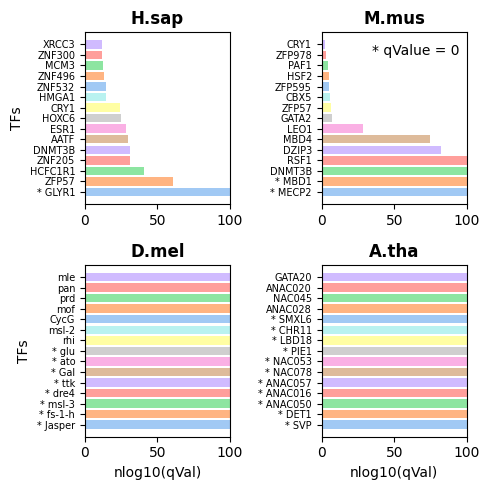

In [29]:
### PLOT
# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

# Plot for df_hg_filt
axes[0, 0].barh(df_hg_filt["TF"].iloc[:15], df_hg_filt['nlog10(qVal)'].iloc[:15], color=sns.color_palette("pastel"))
axes[0, 0].set_xlim(0, 100)
axes[0, 0].set_yticklabels(df_hg_filt["TF"].iloc[:15], size=7)
axes[0, 0].set_ylabel('TFs')
axes[0, 0].set_title('H.sap', fontweight="bold")  # Replace with appropriate title

# Plot for df_mm_filt
axes[0, 1].barh(df_mm_filt["TF"].iloc[:15], df_mm_filt['nlog10(qVal)'].iloc[:15], color=sns.color_palette("pastel"))
axes[0, 1].set_xlim(0, 100)
axes[0, 1].set_yticklabels(df_mm_filt["TF"].iloc[:15], size=7)
axes[0, 1].set_title('M.mus', fontweight="bold")  # Replace with appropriate title

# Plot for df_dm_filt
axes[1, 0].barh(df_dm_filt["TF"].iloc[:15], df_dm_filt['nlog10(qVal)'].iloc[:15], color=sns.color_palette("pastel"))
axes[1, 0].set_xlim(0, 100)
axes[1, 0].set_yticklabels(df_dm_filt["TF"].iloc[:15], size=7)
axes[1, 0].set_xlabel('nlog10(qVal)')
axes[1, 0].set_ylabel('TFs')
axes[1, 0].set_title('D.mel', fontweight="bold")  # Replace with appropriate title

# Plot for df_tair_filt
axes[1, 1].barh(df_tair_filt["TF"].iloc[:15], df_tair_filt['nlog10(qVal)'].iloc[:15], color=sns.color_palette("pastel"))
axes[1, 1].set_xlim(0, 100)
axes[1, 1].set_yticklabels(df_tair_filt["TF"].iloc[:15], size=7)
axes[1, 1].set_xlabel('nlog10(qVal)')
axes[1, 1].set_title('A.tha', fontweight="bold")  # Replace with appropriate title

#Legend
axes[0, 1].text(35, 13, "* qValue = 0", fontsize=10)

# Adjust layout
plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/tf_enriched_EEvsProms_all_species.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/tf_enriched_EEvsProms_all_species.png", format="png", bbox_inches="tight", dpi=450)

# Show the figure
plt.show()

